In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from statsmodels.tools import add_constant as add_constant
from sklearn.metrics import r2_score
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [389]:
data =  pd.read_csv('US_Heart_Patients.csv')

In [390]:
data.shape

(4240, 16)

In [391]:
data.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


1.	Data Ingestion: Read the dataset (tab, csv, xls, txt, inbuilt dataset). Do the descriptive statistics and do null value condition check, write an inference on it.  

In [392]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [394]:
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


In [395]:
data.rename(columns ={'male':'Gender'}, inplace = True)

In [396]:
data.dtypes

Gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [397]:
data = data.dropna()

In [398]:
data.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [399]:
data.shape

(3658, 16)

In [400]:
new_data =data

Split Data set (train – 70% and test – 30%), Using test and train data, calculate R square value and check if the model Over-fit / under-fit model.  Write a detailed inference on it. 

In [401]:
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

In [402]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [403]:
X_train.shape


(2560, 15)

In [404]:
X_test.shape

(1098, 15)

model using Logistic regression considering all the input parameters, calculate all the relevant metrics and write summary (5marks)

In [405]:
lr = LogisticRegression(solver = 'liblinear')

In [406]:
lr.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [407]:
# Model Evaluation of Training data

In [408]:
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]

In [409]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [410]:
y_train_prob

array([0.03757528, 0.07737252, 0.20801109, ..., 0.08513971, 0.12127657,
       0.15249264])

In [411]:
# Confusion Matrix

In [412]:
confusion_matrix(y_train, y_train_pred)

array([[2170,    9],
       [ 359,   22]], dtype=int64)

In [413]:
print('ROC AUC of Train Data:',roc_auc_score(y_train, y_train_prob))

ROC AUC of Train Data: 0.7305585769195097


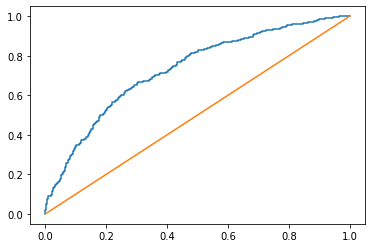

In [414]:
fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)

In [415]:
# Model Evaluation of Testing data

In [416]:
y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]

In [417]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [418]:
y_test_prob

array([0.06141412, 0.21401753, 0.02511335, ..., 0.07501994, 0.04866273,
       0.07618584])

In [419]:
# Confusion Matrix for testing data

In [420]:
confusion_matrix(y_test, y_test_pred)

array([[918,   4],
       [169,   7]], dtype=int64)

In [421]:
print('ROC AUC of Test Data:',roc_auc_score(y_test, y_test_prob))

ROC AUC of Test Data: 0.7471036284756459


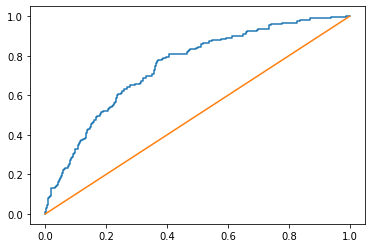

In [422]:
fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)

a. Check for Outlier using Box plot and apply the formula to check how many of these data has outliers 

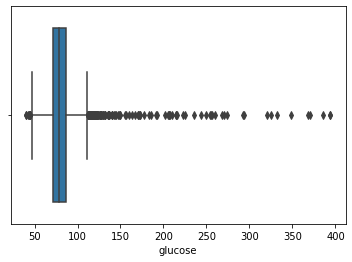

In [423]:
sns.boxplot(data['glucose'])

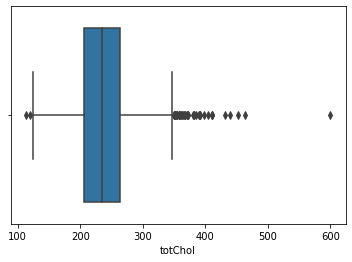

In [424]:
sns.boxplot(data['totChol'])


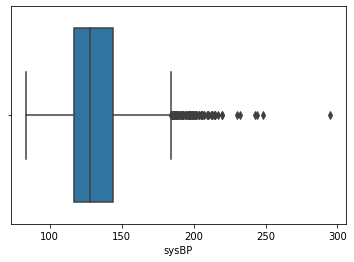

In [425]:
sns.boxplot(data['sysBP'])

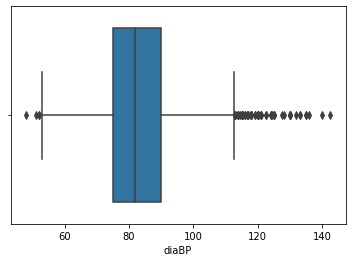

In [426]:
sns.boxplot(data['diaBP'])


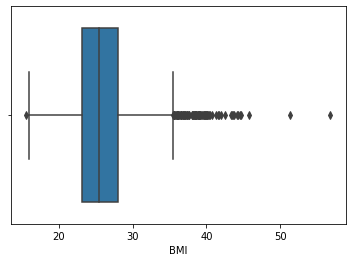

In [427]:
sns.boxplot(data['BMI'])


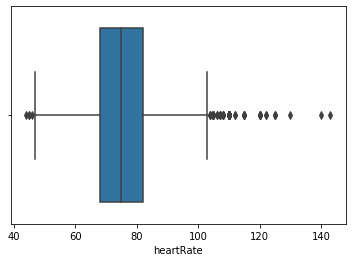

In [428]:
sns.boxplot(data['heartRate'])

In [429]:
new_data = data

In [430]:
# Log transformation
import numpy as np
new_data['totChol'], new_data['sysBP'] ,new_data['diaBP'], new_data['BMI'], new_data['heartRate'], new_data['glucose'] = np.log(data['totChol']),np.log(data['sysBP']),np.log(data['diaBP']),np.log(data['BMI']),np.log(data['heartRate']),np.log(data['glucose'])

Log Transformed New Data

In [431]:
new_data.shape

(3658, 16)

As, we can see that the glucose column is heavily right skewed

In [432]:
# dataframe with categorical features
# df.describe(include=['object'])

In [433]:
# dataframe with numerical features
# df.describe(include=['int64'])

In [434]:
# save all categorical columns in list
#categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object']

# dataframe with categorical features
#data_cat = df[categorical_columns]
# dataframe with numerical features
#data_num = df.drop(categorical_columns, axis=1)

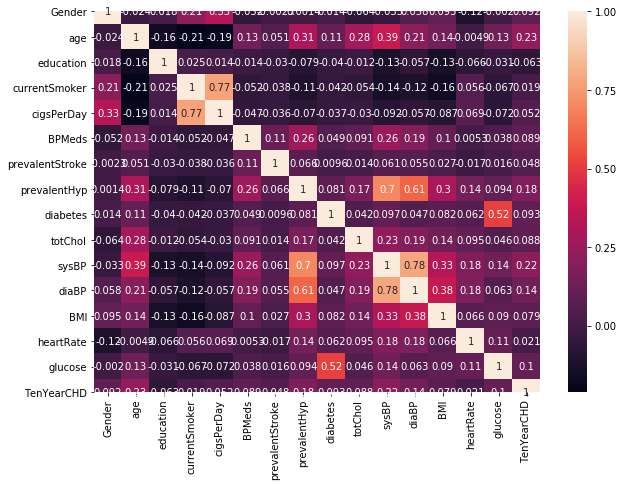

In [435]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot =True)

c. Plot best X with Y and find how the Y is varying with X.
     Like if X is continuous, go for scatter plot.
     if X is categorical, go for box plot.


According to correlation matrix it can be clearly seen that  the highest dependent feature for predicting TenYear CHD is Age.
Therefore making a box plot for the same.

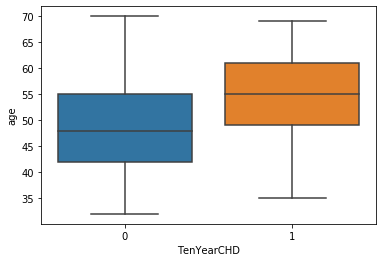

In [436]:
sns.boxplot(x = data['TenYearCHD'], y =data['age'])

performing a statistical test for the same to prove whether the age of patients for ten year CHD is significantly different from each other

Test - 2 sample T-Test

In [437]:
from scipy import stats

In [438]:
stats.ttest_ind(data['TenYearCHD'], data['age'])

Ttest_indResult(statistic=-348.64791360973516, pvalue=0.0)

In [439]:
data['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [440]:
age0 = data[data['TenYearCHD'] == 0]['age']
age1 = data[data['TenYearCHD'] == 1]['age']

In [441]:
age0

0       39
1       46
2       48
4       46
5       43
        ..
4231    58
4234    51
4237    52
4238    40
4239    39
Name: age, Length: 3101, dtype: int64

In [442]:
age1

3       61
6       63
15      38
17      46
25      47
        ..
4221    50
4223    56
4226    58
4232    68
4233    50
Name: age, Length: 557, dtype: int64

In [443]:
stats.ttest_ind(age1, age0)

Ttest_indResult(statistic=14.551681974696821, pvalue=1.1227010347053238e-46)

Since, the P-value of Age of Ten Year CHD 0 and 1 is much less than 0.05 . It proves that the ages for 0 and 1 are significantly different from each other, and therefore is a very important feature for the model building and prediction

d. Apply density plot and check if the data is normally distributed

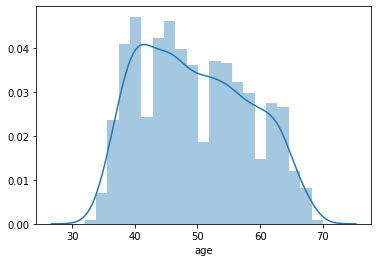

In [444]:
sns.distplot(data['age'])

5.	EDA - Inference: (5 marks)

    Write detailed inference (not observations) about the question 4, few pointers like Outlier detection, outlier treatment, conditions for linearity, impact because of transformation on variables, distributions etc.


6.	Label Encoding / Get Dummies: Build a base model (Include all input parameters) using logistic regression if data is binary / or use any other modelling technique if data in multiclass. 

This data is already encoded . Therefore not creating further dummies.

But here is the code for creating dummies

In [445]:
#cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
#df = pd.get_dummies(df, columns= cat_cols, drop_first = True)

In [446]:
lr = LogisticRegression(solver = 'liblinear')

In [447]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)

In [448]:
X = new_data.drop('TenYearCHD', axis=1)
y = new_data['TenYearCHD']

In [449]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [450]:
X_train.shape


(2560, 15)

In [451]:
X_test.shape

(1098, 15)

model using Logistic regression considering all the input parameters, calculate all the relevant metrics and write summary (5marks)

In [452]:
lr = LogisticRegression(solver = 'liblinear')

In [453]:
lr.fit(X_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [454]:
import statsmodels.api as sm
Xc = sm.add_constant(X_train)
logit_model = sm.Logit(y_train,Xc)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.373029
         Iterations 7


C:\Users\arul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2544
Method:                           MLE   Df Model:                           15
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1133
Time:                        13:31:22   Log-Likelihood:                -954.95
converged:                       True   LL-Null:                       -1076.9
Covariance Type:            nonrobust   LLR p-value:                 2.208e-43
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.6782      3.579     -5.498      0.000     -26.693     -12.663
Gender              0.5249      0.132      3.990      0.000       0.267       0.783
age                 0.0633      0.008      7.862      0.000       0.047       0.079
education          -0.0299      0.060     -0.502      0.615      -0.147       0.087
currentSmoker       0.1499      0.189      0.794      0.427      -0.220       0.520
cigsPerDay          0.0164      0.007      2.195      0.028       0.002       0.031
BPMeds              0.4691      0.270      1.741      0.082      -0.059       0.997
prevalentStroke     1.3756      0.558      2.465      0.014       0.282       2.469
prevalentHyp        0.1172      0.168      0.699      0.485      -0.212       0.446
diabetes            0.3540      0.335      1.056      0.291      -0.303       1.011
totChol             0.5122      0.341      1.501      0.133      -0.157       1.181
sysBP               2.3808      0.686      3.471      0.001       1.037       3.725
diaBP              -0.6237      0.665     -0.938      0.348      -1.927       0.680
BMI                 0.2014      0.417      0.482      0.629      -0.617       1.019
heartRate          -0.1159      0.395     -0.293      0.769      -0.890       0.658
glucose             0.5143      0.314      1.636      0.102      -0.102       1.130
===================================================================================
"""

7.	Data handling: Check conditions for data imputation and data imbalance for the given dataset. Handling data imputation if needed and balance the data (Either go for under sampling or smote). If not, then explain why you do not need sampling.(

In [455]:
y_train.value_counts()

0    2179
1     381
Name: TenYearCHD, dtype: int64

In [456]:
y_test.value_counts()

0    922
1    176
Name: TenYearCHD, dtype: int64

In [457]:
smote = SMOTE(ratio = 'minority', random_state =0)

X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [458]:
pd.Series(y_train_sm).value_counts()

1    2179
0    2179
dtype: int64

8.	Build multiple models by using feature selection and feature engineering and identify which is the good model and write the inference. 

Feature Engineering using VIF

In [459]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['features'] = X.columns

In [460]:
vif

,vif,features
0,2.168228,Gender
1,46.912874,age
2,4.959538,education
3,5.031562,currentSmoker
4,4.293195,cigsPerDay
5,1.136904,BPMeds
6,1.023222,prevalentStroke
7,2.210714,prevalentHyp
8,1.350239,diabetes
9,858.197812,totChol


Feature ENgineerign using RFE

In [461]:
new_data = new_data.drop(['BMI', 'diaBP', 'heartRate', 'glucose', 'education','currentSmoker', 'prevalentHyp', 'diabetes', 'totChol'], axis =1)

In [462]:
new_data

,Gender,age,cigsPerDay,BPMeds,prevalentStroke,sysBP,TenYearCHD
0,1,39,0.0,0.0,0,4.663439,0
1,0,46,0.0,0.0,0,4.795791,0
2,1,48,20.0,0.0,0,4.848116,0
3,0,61,30.0,0.0,0,5.010635,1
4,0,46,23.0,0.0,0,4.867534,0
...,...,...,...,...,...,...,...
4233,1,50,1.0,0.0,0,5.187386,1
4234,1,51,43.0,0.0,0,4.840242,0
4237,0,52,0.0,0.0,0,4.894101,0
4238,1,40,0.0,0.0,0,4.948760,0


In [463]:
X = new_data.drop('TenYearCHD', axis=1)
y = new_data['TenYearCHD']

In [464]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [465]:
smote = SMOTE(ratio = 'minority', random_state =0)

X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

9.	Build a classification model (logistic, decision tree, KNN, Naïve Bayes) and calculate the metric and write inference on all the model and describe which model is very good 

# Logistic Regression Model

AUC score of Train: 0.7266065099269361
[[1444  735]
 [ 710 1469]]


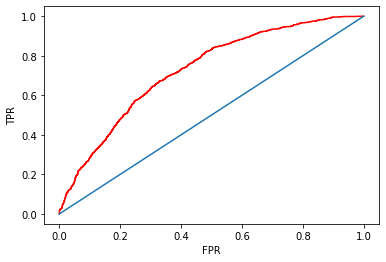

946
AUC score of Test: 0.7216710214947742
[[636 286]
 [ 61 115]]


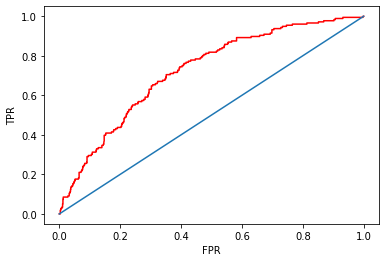

180


In [466]:
model_fit(lr, X_train_sm, y_train_sm , X_test, y_test )

# Random Forest Classifier Model

In [467]:
rf = RandomForestClassifier(random_state=0,criterion='entropy' )

C:\Users\arul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC score of Train: 0.9989703121771695
[[2156   23]
 [  39 2140]]


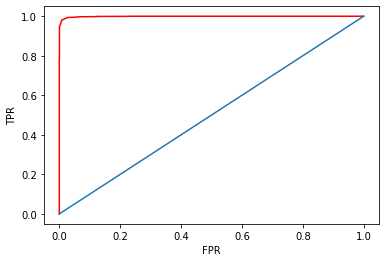

19
AUC score of Test: 0.6325983533819759
[[773 149]
 [120  56]]


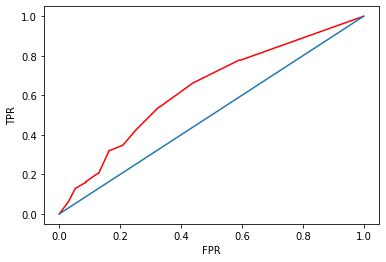

18


In [468]:
model_fit(rf, X_train_sm, y_train_sm, X_test, y_test)

# KNN CLassifier model

In [469]:
knn=KNeighborsClassifier()

AUC score of Train: 0.9300734766190941
[[1762  417]
 [ 275 1904]]


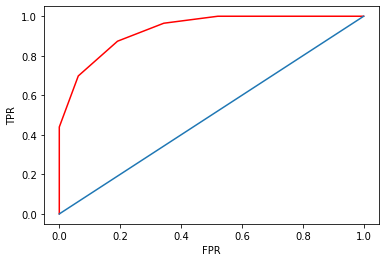

3
AUC score of Test: 0.6147517747978702
[[679 243]
 [102  74]]


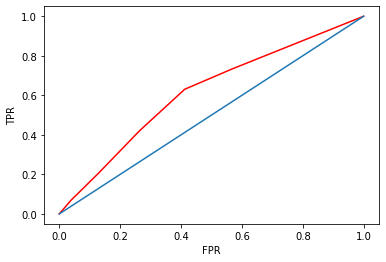

4


In [470]:
model_fit(knn,  X_train_sm, y_train_sm, X_test, y_test)

# Decision Tree Classifier Model

In [471]:
DT=DecisionTreeClassifier()

AUC score of Train: 0.9999438715883034
[[2179    0]
 [  23 2156]]


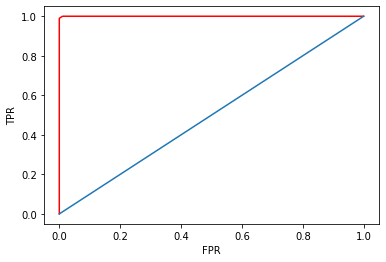

1
AUC score of Test: 0.5574282685860776
[[732 190]
 [119  57]]


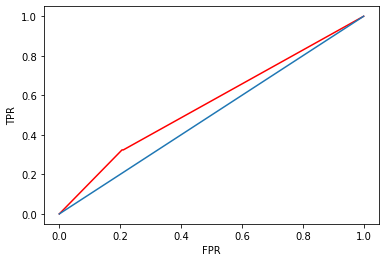

1


In [472]:
model_fit(DT, X_train_sm, y_train_sm, X_test, y_test)

In [473]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, random_state=None, error_score=’raise-deprecating’, return_train_score=False)